# PHOTO-ELECTORN DETECTION BY CATHODE AND MEMBRANE MODULES

The notebook takes the first sheet from the link to the saturation analysis Google Spreadsheet
(https://docs.google.com/spreadsheets/d/1BewrMeG0FQHEWywyAKXJGsJ9_qJMtquZ9kjCPlbv4n4/edit?usp=sharing).

The main features for each run done during period 20-28 august are shown in the table: energy, target, level of high and low preassure for Cherenkov trigger, type of particle depending on the region indicated by the Cherenkov thresholds. For each module, the number of photolectrons detetcted by event by the pair of channels is calculated as the ratio between the energy collected (charge: integral of the wfset) and the single photoelectron charge. The collected data is specific for each type of configuration of the Cherenkov triggers, so to being able to recognise the impact on the detectors operated by the different types of particles.
P.S. From the signal only not saturated wfs are selected. Still, a small part of the saturated wfs caused by the cold electronics are still taken to calculate the charge, but these are not abundant (only present in the membrane) and their impact not relevant.

The aim of this notebook is taking the infos registered in the spreadsheet to create histograms, representing #peVSmodules. Would be nice to have a 3D visualisation of the histograms as a lego plot, taking into account the real position of the modules in the real ProtoDUNE-VD detector.

Other plot represents the total number of pe detected by the PDS VS the energy of the single run. It represents the energy loss in terms of total photoelectrons emetted in the specific run. It should be linear, since the more energy the particles have, the more photoelectrons should be produced. But a saturation effect is expected by the simulations starting from 2 GeV.

Moreover, the idea would be to compare the experimental data to the results coming from a simulation of
the detection system, to see if they are comparable or not.

In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [2]:
'''
ORIGINAL DATAFRAME
'''
#load the csv file from public directory and create the pandas DataFrame
saturation_file = "/afs/cern.ch/work/l/liacob/public/saturation_hist/modules_pe.csv"
df = pd.read_csv(saturation_file, sep=",")

df

,Run,Energy,Target,LP,HP,CH,Part,M5,M6,M1,...,C3,C5,C8,C7,C6,M3,M4,M7,M8,Sum
0,39110,0.2,Cu,5.0,10,Total,total,143.590817,156.750035,1225.59108,...,2055.469216,536.356198,3984.933873,1185.530362,2161.137987,389.319350,859.180996,70.940010,161.825348,17350.660965
1,39110,0.2,Cu,5.0,10,HL,e,123.485512,102.886925,793.75966,...,1619.825839,485.769072,2582.169120,1018.800618,1590.836275,323.169700,747.535573,63.583230,112.411762,13251.917278
2,39110,0.2,Cu,5.0,10,HLx,no_particle,153.969475,99.317448,2392.59334,...,1323.576575,391.796899,4499.726877,1828.975368,2625.225268,391.337934,783.185767,48.776848,222.114131,21415.074931
3,39110,0.2,Cu,5.0,10,HxLx,"mu,pi,pr",187.767397,269.785182,2213.57490,...,4336.271665,846.662497,7067.775191,1709.007390,3200.920233,546.569526,1136.883273,88.402453,227.465879,28765.132077
4,39111,0.3,Cu,5.0,10,Total,total,85.608508,76.350274,1295.36818,...,1868.653871,420.665440,1651.359706,625.324973,990.903139,182.397910,309.750935,55.907464,142.705635,11070.318562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,39163,0.4,Cu,5.0,10,HxLx,"mu,pi,pr",0.000000,0.000000,262.85644,...,239.399344,1121.469923,16873.164880,0.000000,7504.036846,0.000000,0.000000,0.000000,0.000000,34465.307853
68,392752,1.0,W,4.5,14,Total,total,0.000000,0.000000,0.00000,...,6420.938095,2455.049851,2991.328684,1284.349689,863.970126,0.000000,0.000000,0.000000,0.000000,23642.048370
69,392752,1.0,W,4.5,14,HL,e,0.000000,0.000000,0.00000,...,139.135325,51.573948,139.141535,115.066485,8.087991,0.000000,0.000000,0.000000,0.000000,751.334489
70,392752,1.0,W,4.5,14,HLx,mu,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Histograms based on run number - 2D

In [3]:
'''
SELECTION OF THE RUN
'''
run = 39110

In [4]:
#filter the DataFrame creating another one just for the selected run
df_run = df[df.iloc[:, 0] == run] #df based on the specific run
df_run

,Run,Energy,Target,LP,HP,CH,Part,M5,M6,M1,...,C3,C5,C8,C7,C6,M3,M4,M7,M8,Sum
0,39110,0.2,Cu,5.0,10,Total,total,143.590817,156.750035,1225.59108,...,2055.469216,536.356198,3984.933873,1185.530362,2161.137987,389.319350,859.180996,70.940010,161.825348,17350.660965
1,39110,0.2,Cu,5.0,10,HL,e,123.485512,102.886925,793.75966,...,1619.825839,485.769072,2582.169120,1018.800618,1590.836275,323.169700,747.535573,63.583230,112.411762,13251.917278
2,39110,0.2,Cu,5.0,10,HLx,no_particle,153.969475,99.317448,2392.59334,...,1323.576575,391.796899,4499.726877,1828.975368,2625.225268,391.337934,783.185767,48.776848,222.114131,21415.074931
3,39110,0.2,Cu,5.0,10,HxLx,"mu,pi,pr",187.767397,269.785182,2213.57490,...,4336.271665,846.662497,7067.775191,1709.007390,3200.920233,546.569526,1136.883273,88.402453,227.465879,28765.132077


In [5]:
'''
#SELECTION OF ONE SINGLE TRIGGER

#ch_trigger selected: Total, HL, HxL, HxLx
ch_trigger = 'Total'

#filter the DataFrame of the run creating another one just for the selected cherenkov trigger region
df_run_ch = df_run[df_run.iloc[:, 5] == ch_trigger]

#type of particle selected by the ch_trigger choice
part = df_run_ch.iloc[0]['Part']

#exctraction of the #pe for each module as an array
pes = df_run_ch.iloc[0, 7:-1].to_numpy(dtype=np.float64)

#histogram
plt.figure(figsize=(8,5))
plt.title('Histogram - RUN = {:}: ChTriggers = {:}, Particles = {:}'.format(run, ch_trigger, part), fontweight='bold')
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.3)
plt.bar(modules, pes, color='teal')
plt.xlabel('Modules', fontweight='bold')
plt.ylabel('#pe', fontweight='bold')
plt.show()
'''

"\n#SELECTION OF ONE SINGLE TRIGGER\n\n#ch_trigger selected: Total, HL, HxL, HxLx\nch_trigger = 'Total'\n\n#filter the DataFrame of the run creating another one just for the selected cherenkov trigger region\ndf_run_ch = df_run[df_run.iloc[:, 5] == ch_trigger]\n\n#type of particle selected by the ch_trigger choice\npart = df_run_ch.iloc[0]['Part']\n\n#exctraction of the #pe for each module as an array\npes = df_run_ch.iloc[0, 7:-1].to_numpy(dtype=np.float64)\n\n#histogram\nplt.figure(figsize=(8,5))\nplt.title('Histogram - RUN = {:}: ChTriggers = {:}, Particles = {:}'.format(run, ch_trigger, part), fontweight='bold')\nplt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.3)\nplt.bar(modules, pes, color='teal')\nplt.xlabel('Modules', fontweight='bold')\nplt.ylabel('#pe', fontweight='bold')\nplt.show()\n"

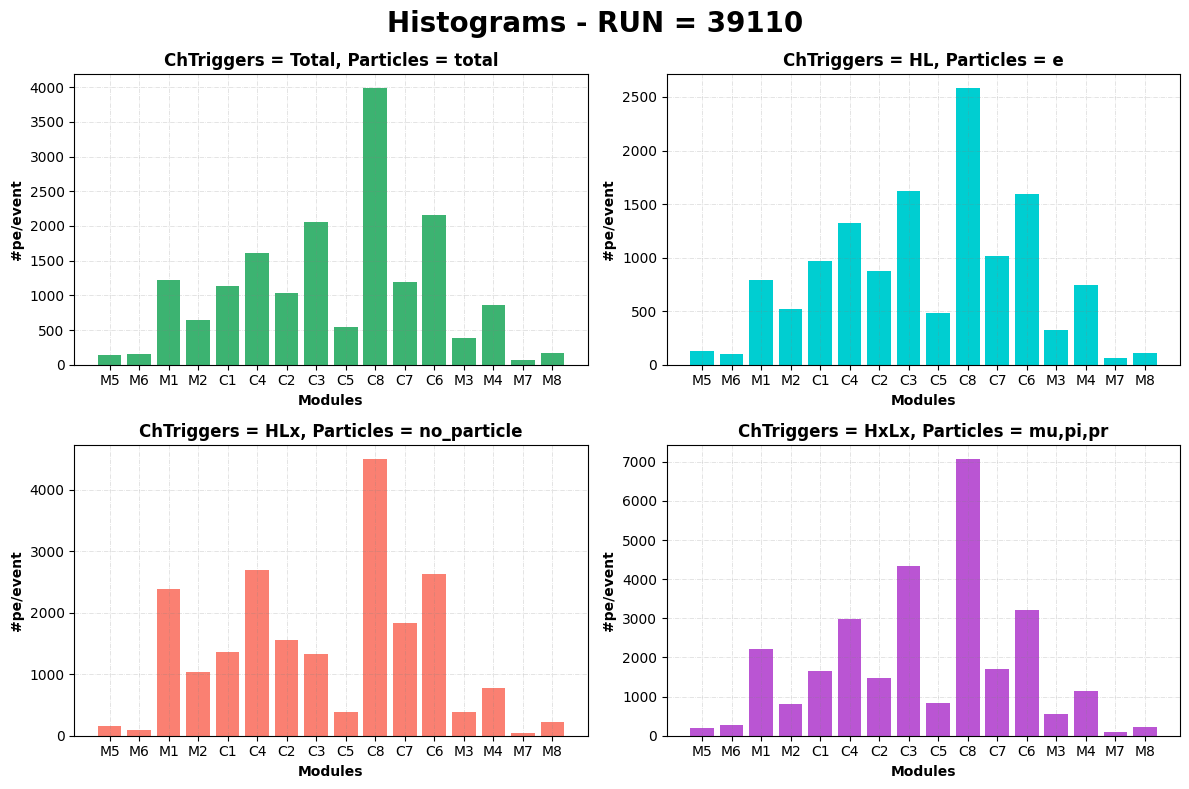

In [6]:
'''
HISTOGRAMS IN 2D - ALL TRIGGERS FOR THE CHOSEN RUN
'''
#si potrebbe migliorare mettendo le variabili in una lista e facendo un ciclo for ma non ho il tempo per pensarci :)

#type of particle selected by all the Cherenkov triggers
part_total = df_run.iloc[0]['Part']
part_HL = df_run.iloc[1]['Part']
part_HLx = df_run.iloc[2]['Part']
part_HxLx = df_run.iloc[3]['Part']

#exctract the name of the modules from the DataFrame
#modules = df.columns[7:-1].tolist()
modules = ['M5', 'M6', 'M1', 'M2', 'C1', 'C4', 'C2', 'C3', 'C5', 'C8', 'C7', 'C6', 'M3', 'M4', 'M7', 'M8']

#exctraction of the #pe for each module of each ch_trigger as an array
pes_total = np.array([])
pes_HL = np.array([])
pes_HLx = np.array([])
pes_HxLx = np.array([])
for x in modules:
    pes_total = np.append(pes_total, df_run.iloc[0][x])
    pes_HL = np.append(pes_HL, df_run.iloc[1][x])
    pes_HLx = np.append(pes_HLx, df_run.iloc[2][x])
    pes_HxLx = np.append(pes_HxLx, df_run.iloc[3][x])

#histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

def hist2D(x_coo, y_coo, pes_type, ch_type, part_type, col):
    axs[x_coo, y_coo].set_title('ChTriggers = {:}, Particles = {:}'.format(ch_type, part_type), fontweight='bold')
    axs[x_coo, y_coo].grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.3)
    axs[x_coo, y_coo].bar(modules, pes_type, color=col)
    axs[x_coo, y_coo].set_xlabel('Modules', fontweight='bold')
    axs[x_coo, y_coo].set_ylabel('#pe/event', fontweight='bold')

hist2D(0, 0, pes_total, 'Total', part_total, 'mediumseagreen')
hist2D(0, 1, pes_HL, 'HL', part_HL, 'darkturquoise')
hist2D(1, 0, pes_HLx, 'HLx', part_HLx, 'salmon')
hist2D(1, 1, pes_HxLx, 'HxLx', part_HxLx, 'mediumorchid')


plt.suptitle('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)
plt.tight_layout()
#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_2DHist.png'.format(run))

Text(0, 0.5, '#pe/event')

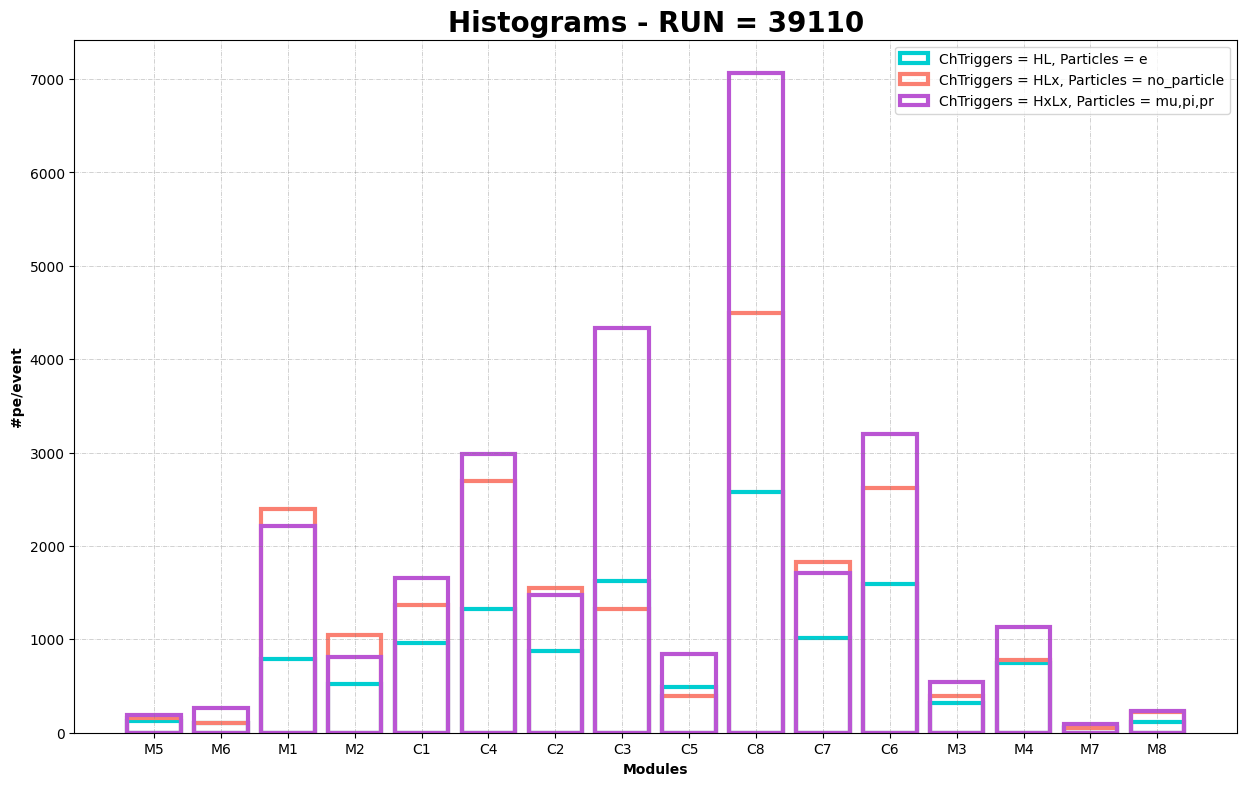

In [7]:
'''
HISTOGRAMS (BAR) IN 2D - ALL TRIGGERS FOR THE CHOSEN RUN TOGETHER FOR STATISTICS COMPARISON
'''

plt.figure(figsize=(15,9))
plt.title('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.5)
plt.bar(modules, pes_HL, linewidth=3, edgecolor='darkturquoise', fill=False, label='ChTriggers = {:}, Particles = {:}'.format('HL', part_HL))
plt.bar(modules, pes_HLx, linewidth=3, edgecolor='salmon', fill=False, label='ChTriggers = {:}, Particles = {:}'.format('HLx', part_HLx))
plt.bar(modules, pes_HxLx, linewidth=3, edgecolor='mediumorchid', fill=False, label='ChTriggers = {:}, Particles = {:}'.format('HxLx', part_HxLx))
plt.legend()
plt.xlabel('Modules', fontweight='bold')
plt.ylabel('#pe/event', fontweight='bold')
#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_2DTotalHist_bar.png'.format(run))

Text(0, 0.5, '#pe/event')

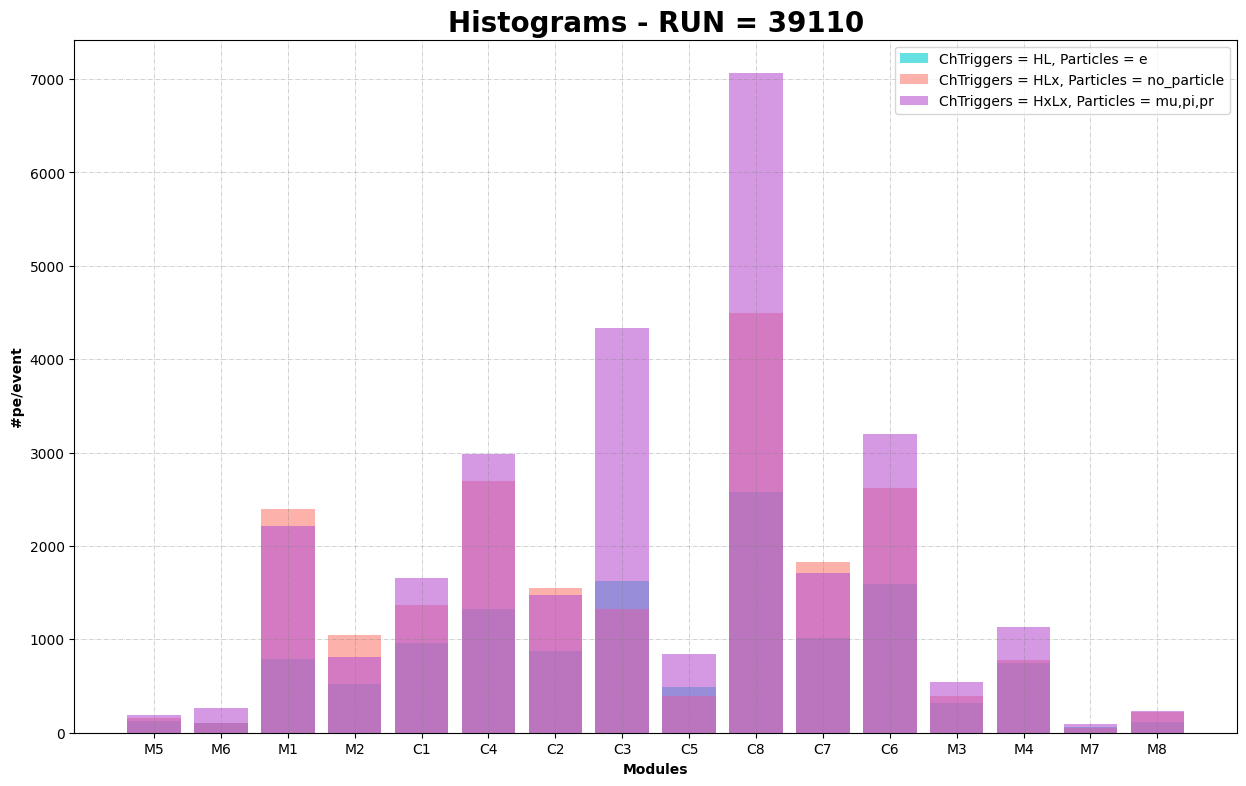

In [8]:
'''
HISTOGRAMS (STAIRS) IN 2D - ALL TRIGGERS FOR THE CHOSEN RUN TOGETHER FOR STATISTICS COMPARISON
'''
plt.figure(figsize=(15,9))
plt.title('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.5)
plt.bar(modules, pes_HL, color='darkturquoise', label='ChTriggers = {:}, Particles = {:}'.format('HL', part_HL), alpha=0.6)
plt.bar(modules, pes_HLx, color='salmon', label='ChTriggers = {:}, Particles = {:}'.format('HLx', part_HLx), alpha=0.6)
plt.bar(modules, pes_HxLx, color='mediumorchid', label='ChTriggers = {:}, Particles = {:}'.format('HxLx', part_HxLx), alpha=0.6)
plt.legend()
plt.xlabel('Modules', fontweight='bold')
plt.ylabel('#pe/event', fontweight='bold')
#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_2DTotalHist_bar.png'.format(run))

# Histograms based on run number - 3D (LEGO Plot)

In [9]:
'''
MAP of the modules location in the detector on x-y grid
'''

xd=0.75 #x_dimension of the module [m]
yd=0.75 #y_dimension of the module [m]
modules_map = {
    'M1': (-6*xd, 1.5*yd), 'M2': (-5*xd, 1.5*yd), 'M5': (-3*xd, 1.5*yd), 'M6': (-2*xd, 1.5*yd),
    'C1': (1*xd, 1*yd), 'C4': (2*xd, 3*yd), 'C2': (3*xd, 0*yd), 'C3': (4*xd, 2*yd),
    'C5': (5*xd, 1*yd), 'C8': (6*xd, 3*yd), 'C7': (7*xd, 2*yd), 'C6': (7*xd, 0*yd),
    'M3': (11*xd, 1.5*yd), 'M4': (12*xd, 1.5*yd), 'M7': (14*xd, 1.5*yd), 'M8': (15*xd, 1.5*yd),
}

In [55]:
#Function for 3D plots

def subhist(coord, dz_part, part_type, colors, **kwargs):
    m_map = kwargs.get("m_map", False) #True if you want to plot the map

    # Coord x, y from mapping
    x = [modules_map[m][0] for m in modules]
    y = [modules_map[m][1] for m in modules]
    z = np.zeros(len(modules))  # bars baseline at z=0
    x_dim=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 8, 8, 8, 8], dtype=object)*xd
    x_dim[[6, 16]]=''
    y_dim=np.full(22, '', dtype=object)
    y_dim[[9, 10, 11, 12, 13]]=[0, 1*yd,2*yd,3*yd,4*yd]
    dx = dy = 0.75 #dimensions of the modules

    ax = fig.add_subplot(coord, projection='3d')

    #bars
    ax.bar3d(x, y, z, dx, dy, dz_part, color=colors, alpha=0.8, shade=True, zorder=9)
    #(non-)tco
    ax.scatter(0, np.arange(-8*yd, 14*yd, yd), marker='.', color='black', zorder=8)
    ax.text(-3.4, -3, 0, "NON-TCO", va='center', fontweight='bold', zorder=20)
    ax.scatter(7.5, np.arange(-8*yd, 14*yd, yd), marker='.', color='black', zorder=8)
    ax.text(9.5, -3, 0, "TCO", va='center', fontweight='bold', zorder=20)

          
    ax.xaxis.pane.set_visible(False)
    ax.yaxis.pane.set_visible(False)
    ax.xaxis._axinfo["grid"]['linewidth'] = 0.2
    ax.yaxis._axinfo["grid"]['linewidth'] = 0.2
    ax.set_xlabel('x [m]', fontweight='bold')
    ax.set_ylabel('y [m]', fontweight='bold')
    ax.set_xticks(np.arange(-6*xd,16*xd,xd))
    ax.set_xlim(-6*xd, 16*xd)
    ax.set_xticklabels(x_dim)
    ax.set_yticks(np.arange(-8*yd,14*yd,yd))
    ax.set_ylim(-8*yd, 14*yd)
    ax.set_yticklabels(y_dim)
    ax.view_init(elev=50, azim=-65) #for lego_plot representationa
    #ax.view_init(elev=40, azim=-75) #for 3Dmap_rotated representation

    
    if m_map==False:
        ax.set_zlim(bottom=0)
        ax.set_zlabel('#pe/event', fontweight='bold')  
        ax.set_title('ChTriggers = {:}, Particles = {:}'.format('Total', part_type), fontweight='bold')
        for xi, yi, zi, label in zip(x, y, dz_part, modules):
            ax.text(xi + dx/2, yi + dy/2, zi + zi*0., f'{zi:.0f}', ha='center', va='bottom', fontsize=11, zorder=18)
    else:
        ax.set_zlim(-3, 3)
        ax.yaxis._axinfo["grid"]['linewidth'] = 0
        ax.xaxis._axinfo["grid"]['linewidth'] = 0
        ax.set_zlabel('z [m]', fontweight='bold')
        #cathode plane
        x_range = np.arange(-6*xd, 17*xd, xd)
        y_range = np.arange(-8*yd, 15*yd, yd)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.zeros_like(X)
        ax.plot_surface(X, Y, Z, color='gray', edgecolor='lightgray', alpha=0.05, linewidth=0.4) 
        #beam
        xp=1.7
        yp=3
        zp=1.1
        t=np.linspace(-10,10)
        xx=xp-t
        yy=yp+t
        zz=zp+0.1405*t
        ax.plot(xx, yy, zz, color='red', zorder=11)
        ax.scatter(xp, yp, zp, color='red') #beam enters the detector
        ax.scatter(xx[5], yy[5], z[5], color='red') #beam intersects the plane at z~0 (~-0.018)
        #detector shape
        ax.scatter(np.arange(-6*xd, 17*yd, xd), 0*yd, marker='.', color='black', zorder=18)
        ax.scatter(np.arange(-6*xd, 17*xd, xd), 4*yd, marker='.', color='black', zorder=18)
            
    for xi, yi, zi, label in zip(x, y, dz_part, modules):
            ax.text(xi + dx/2, yi + dy/2,  zi + max(dz_part)*0.1, label, ha='center', va='bottom', fontsize=11, fontweight='bold', zorder=19)

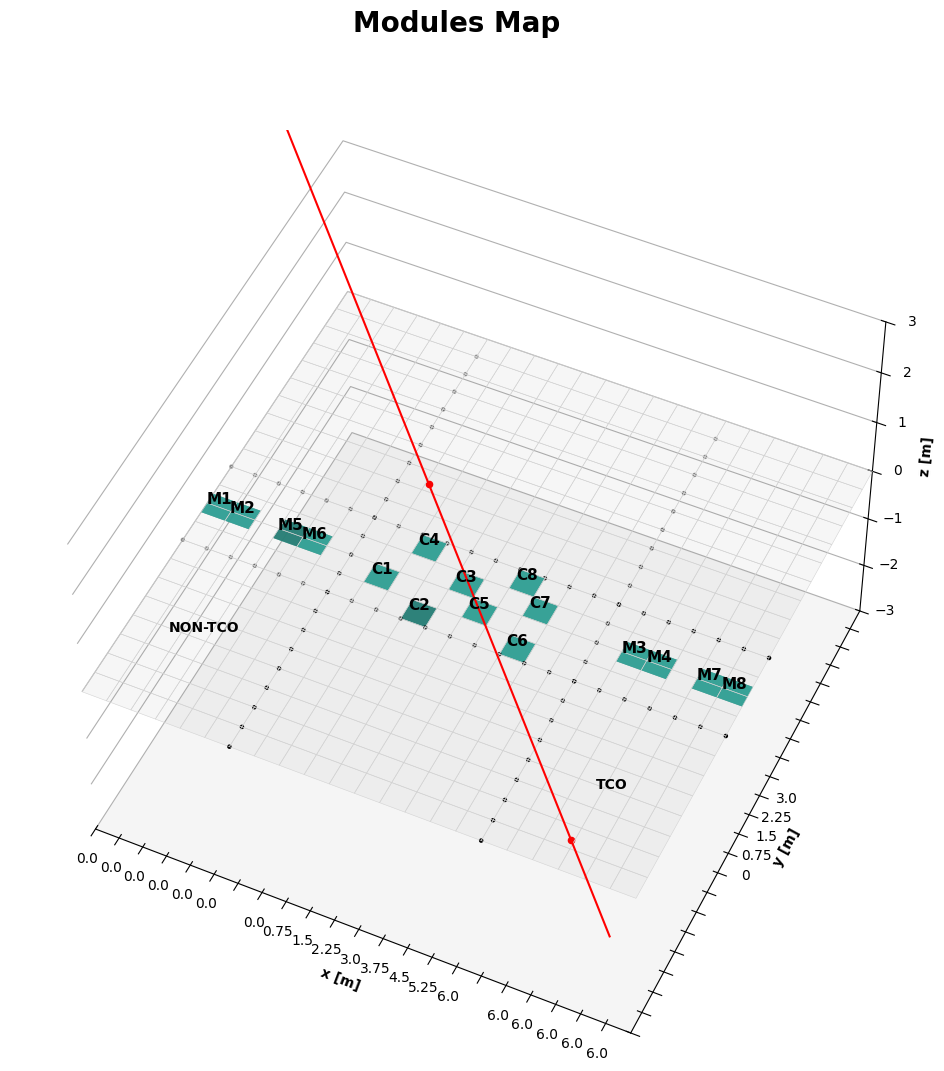

In [56]:
'''
REPRESENTATIVE MAP OF THE MODULES
'''

fig = plt.figure(figsize=(12, 12))
plt.suptitle('Modules Map', fontweight='bold', fontsize=20)

dz_map=np.zeros(16)
subhist(111, dz_map, '', 'turquoise', m_map=True)

#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/3DMap_rotated.png')

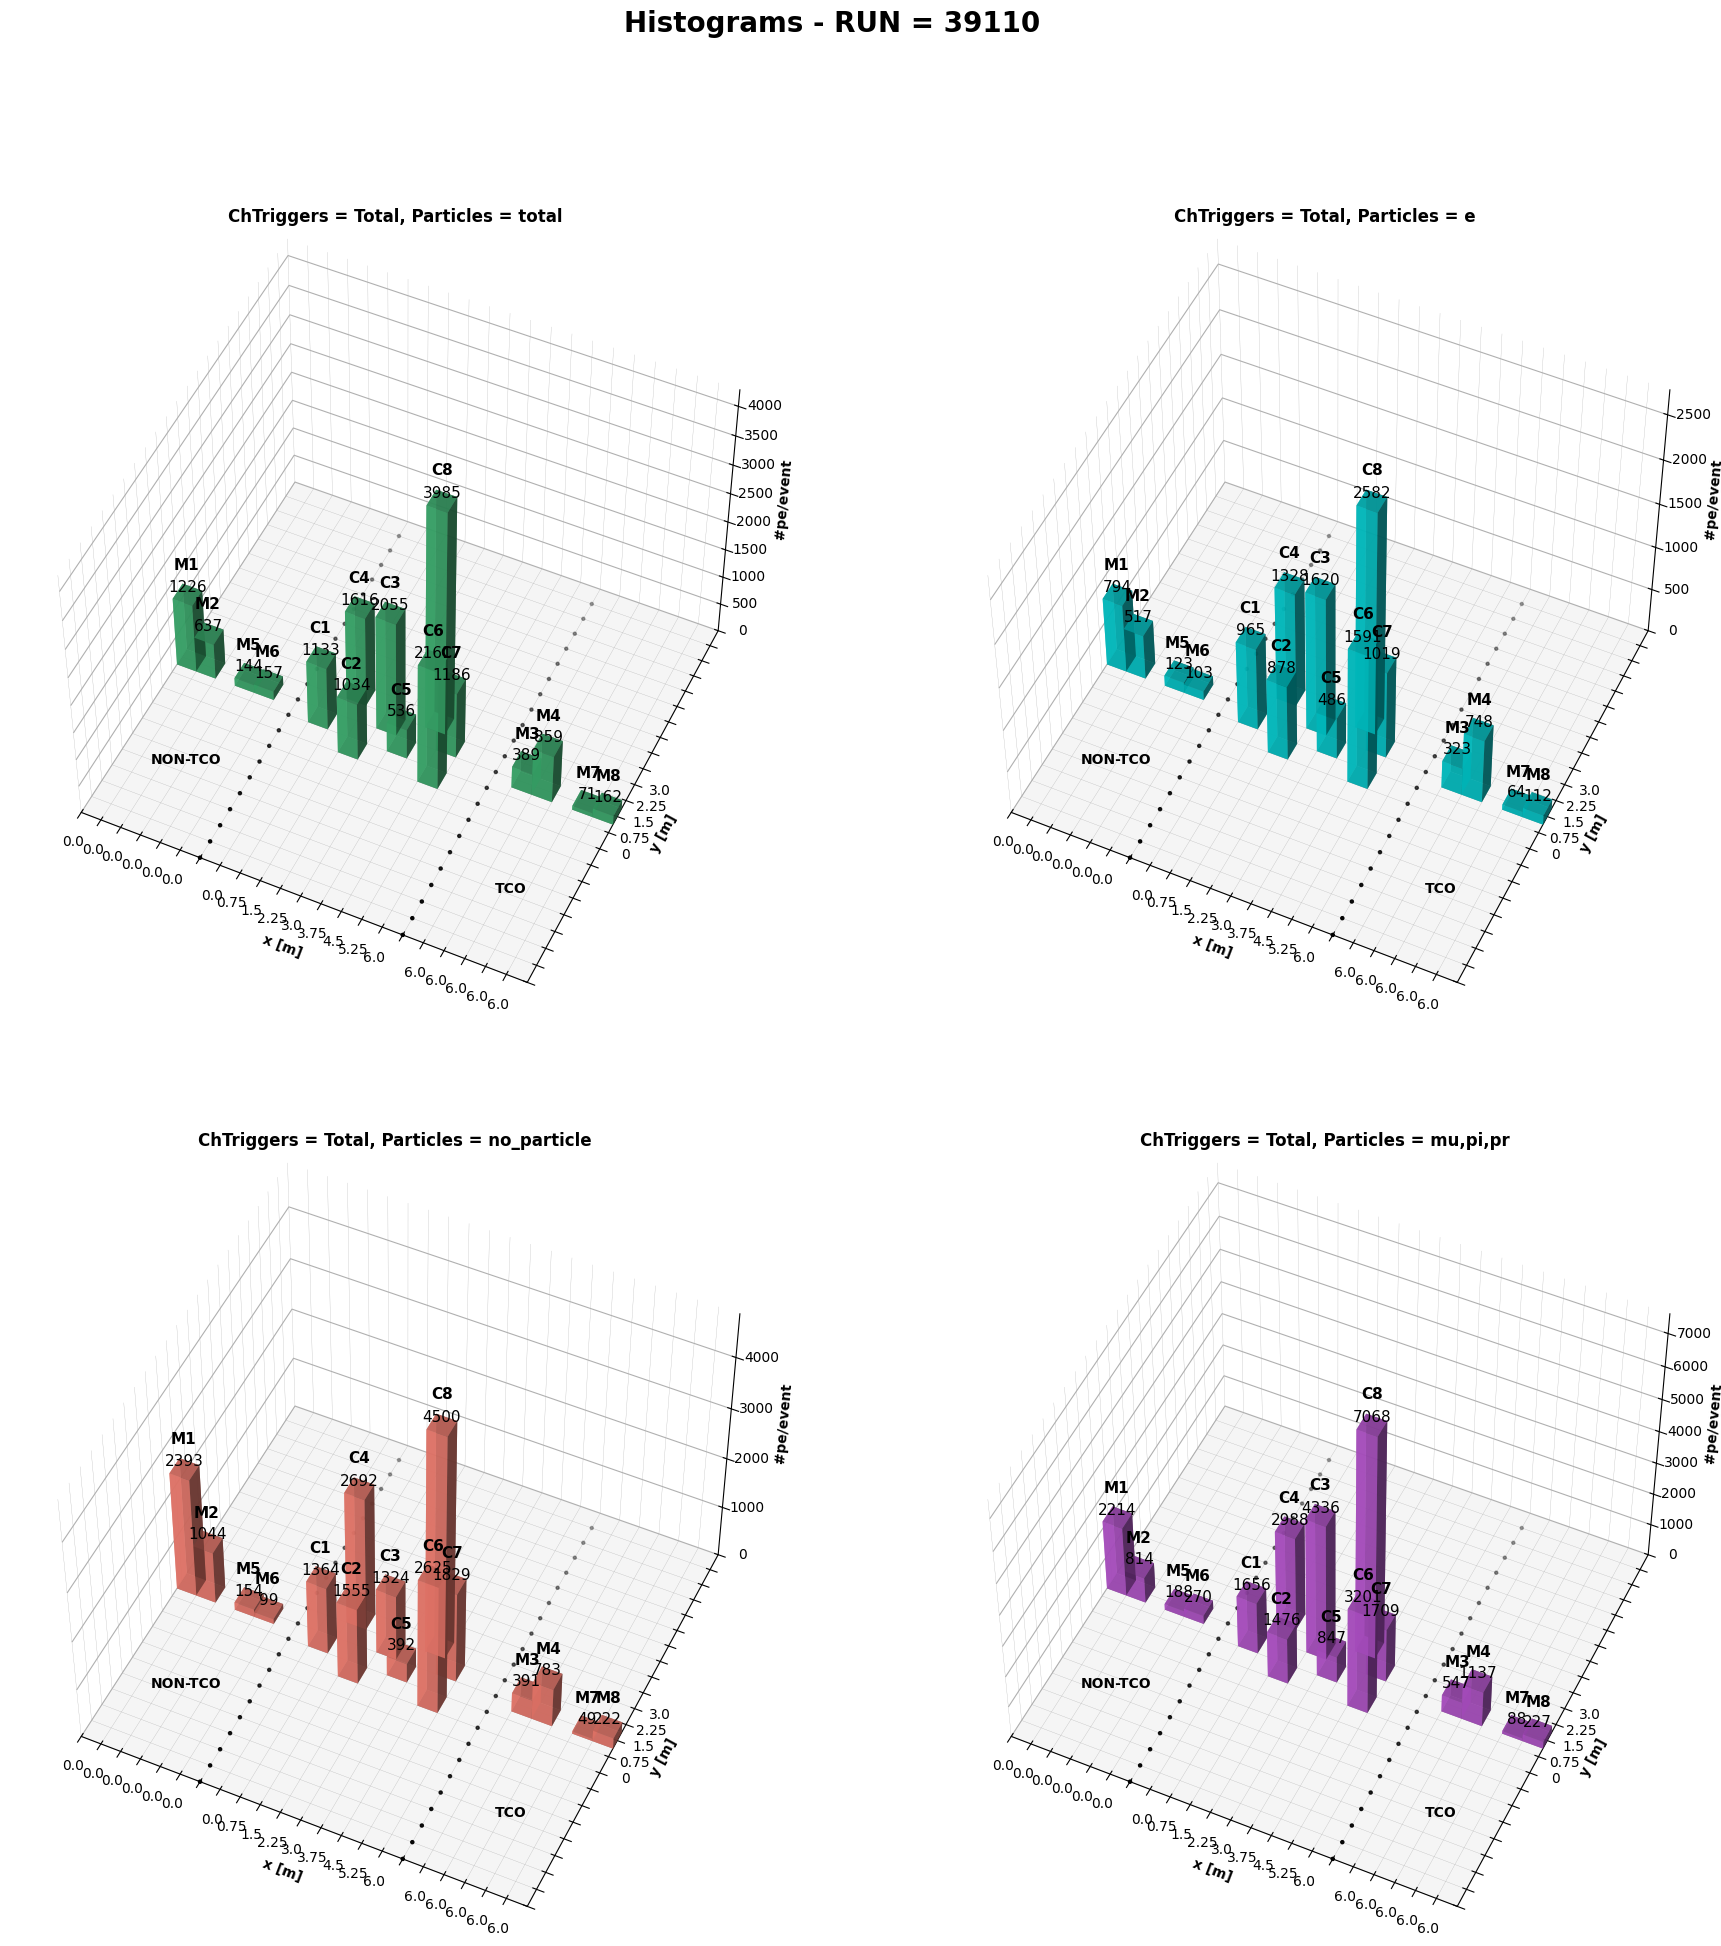

In [57]:
'''
HISTOGRAMS IN 3D (LEGO PLOT) - ALL TRIGGERS FOR THE CHOSEN RUN
'''

fig = plt.figure(figsize=(22, 22))
plt.suptitle('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)

dz_total = pes_total
dz_HL = pes_HL
dz_HLx = pes_HLx
dz_HxLx = pes_HxLx

color_total = ['mediumseagreen'] * len(modules)
color_HL = ['darkturquoise'] * len(modules)
color_HLx = ['salmon'] * len(modules)
color_HxLx = ['mediumorchid'] * len(modules)

subhist(221, dz_total, part_total, color_total)
subhist(222, dz_HL, part_HL, color_HL)
subhist(223, dz_HLx, part_HLx, color_HLx)
subhist(224, dz_HxLx, part_HxLx, color_HxLx)

#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_3DHist.png'.format(run))

# NpeVSEnergy


SPIEGAZIONE (Henrique) - ISSUE0: Negative charge
La carica può venire negativa perchè nel calcolo dell'integrale magari nel set di wfs ottieni una wf che ha
un andamento strano ed esplosivo verso canali adc negativi. Per questo motivo, l'energia viene calcolcata
male.


APPUNTI (Henrique) - ISSUE1: Appiattimento retta ad alte energie
L'andamento atteso dovrebbe avere una forma lineare. Quando si fa il grafico per la somma di tutti i foto-
elettroni rivelati per il run specifico si vede che ad alte energie si ha un appiattimento. Forse perchè 
ad alte energie le wfs sono più intense (risposta della TPC di segnale di luce: maggiore energia, maggiore
luce) e, quindi, hanno bisogno di un numero maggiore di canali adc per essere letti. Questo comporta un ef-
fetto di saturazione del segnale a causa di cold electronics o anche della DAPHNE, ma questi ultimi vengono
filtrati e tolti, mentre i primi riportano, essendo appunto saturati, un #pe non veritiero.

APPUNTI - ISSUE2: Basse energie
A più basse energie c'è una rapida discesa per qualche motivo.





DOMANDA per HENRIQUE - SOLUTION2(?)
Sarebbe carino poter fare una stima dell'errore nel calcolo della somma di #pe detected, 
ma per fralo devo propagare l'errore associato alla carica(energia=integrale) del singolo pe e del valore
medio estratto per ciascun canale di ogni modulo. Si può fare? 
Perchè a basse energie si ha un andamento strano, per cui bisogna capire se sono solo fluttuazioni statistiche.

RISPOSTA di HENRIQUE - SOLUTION2(?)
- Prima di tutto meglio se dal calcolo vengono tolti i moduli M1, M2 perchè problematici e C3 perchè il canale
C3(2) è particolarmente rumoroso, come visto dalle analisi di Gloria. Mentre C5 dà problemi.
- L'idea per l'errore sarebbe quello di prendere non quello di "spe_charge" perchè superficialmente si può deci-
dere di non considerarlo, anche perchè per ogni run noi prendiamo sempre gli stessi valori nonostante cambi l'e-
nergia perché le analisi loro le hanno fatte sono una volta e sperano che non cambino, perché se no è un casi-
no anche per loro :)
Allora si dovrebbe solo stimare gli errori di "charge" (valore medio dell'energia, cioè sul totale degli eventi)
e per farlo si dovrebbe modificare il codice della saturazione. Infatti, se la charge viene dal calcolo della me-
dia, per la stima dell'erore si dovrebbe cercare la standard deviation. Per cui, sarebbe da aggiungere al dizio-
nario la variabile stdcharge = np.rms(charges - meancharge). Però già il calcolo della media viene fatto sulla 
distribuzione che ha un andamento non monocromatico perchè le wfs sono spread lungo i canali adc - per cui la me-
dia è bruttina. Questo fa sì che la deviazione standard diventi particolarmente grande perchè base dell'istogram-
ma è larga. Un modo per migliorare la cosa sarebbe utilizzare quantile e togliere le code al 2% o 5%, così da
eliminare potenzialmente gli outliners. Però ancora forse si dovrebbe fare un'analisi più approfondita, ma non è 
il mio caso al momento perchè me ne devo andare :( </3.


IDEA di FRANCESCA
- Considerare nei calcoli anche l'efficienza del modulo. Henrique dice che dovrebbero essere tutti più o meno ugua-
li al 2-3% perché così erano anche per gli altri prototipi.
- Altro modo di calcolare la std è quello di prendere l'errore della media, cioè prendere per i diversi run della
stessa energia il valore medio "charge" e poi vedere quanto questi sono spread e prendere l'errore in base alla
loro fluttuazione. Sarebbe interessante, ma qui per ogni energia abbiamo praticamente un solo run, per cui non si
può fare, purtroppo.


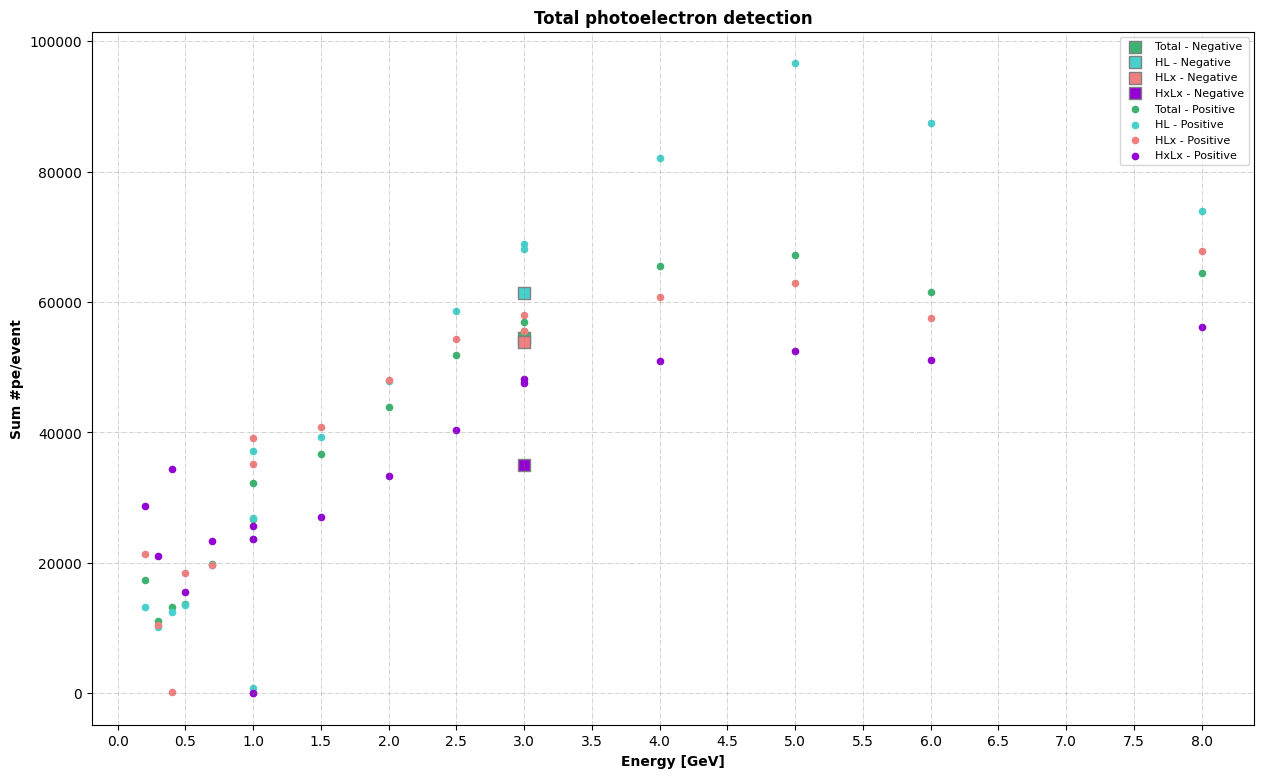

In [39]:
'''
#peVSE
'''

#plot (expected linear)

def make_plot(negative=False):
    run_list=[]
    energy=[]
    pe_sum_total=[]
    pe_sum_HL=[]
    pe_sum_HLx=[]
    pe_sum_HxLx=[]
    for j in range(0, len(df)-1, 4):
        if not negative and df.iloc[j,1] > 0:
            run_list.append(df.iloc[j,0])
            energy.append(df.iloc[j,1])
            pe_sum_total.append(df.iloc[j,-1]) # - total
            pe_sum_HL.append(df.iloc[j+1,-1]) # - HL
            pe_sum_HLx.append(df.iloc[j+2,-1]) # - HLx
            pe_sum_HxLx.append(df.iloc[j+3,-1]) # - HxLx      
        elif negative and df.iloc[j,1] < 0:
            run_list.append(df.iloc[j,0])
            energy.append(abs(df.iloc[j,1]))
            pe_sum_total.append(df.iloc[j,-1]) # - total
            pe_sum_HL.append(df.iloc[j+1,-1]) # - HL
            pe_sum_HLx.append(df.iloc[j+2,-1]) # - HLx
            pe_sum_HxLx.append(df.iloc[j+3,-1]) # - HxLx
    if not negative:
        plt.scatter(energy, pe_sum_total, color='mediumseagreen', label='Total - Positive', marker='.', s=80)
        plt.scatter(energy, pe_sum_HL, color='mediumturquoise', label='HL - Positive', marker='.', s=80)
        plt.scatter(energy, pe_sum_HLx, color='lightcoral', label='HLx - Positive', marker='.', s=80)
        plt.scatter(energy, pe_sum_HxLx, color='darkviolet', label='HxLx - Positive', marker='.', s=80)
    else:  
        plt.scatter(energy, pe_sum_total, color='mediumseagreen', marker="s", s=80, edgecolors='gray', label='Total - Negative')
        plt.scatter(energy, pe_sum_HL, color='mediumturquoise', marker="s", s=80, edgecolors='gray', label='HL - Negative')
        plt.scatter(energy, pe_sum_HLx, color='lightcoral', marker="s", s=80, edgecolors='gray', label='HLx - Negative')
        plt.scatter(energy, pe_sum_HxLx, color='darkviolet', marker="s", s=80, edgecolors='gray', label='HxLx - Negative')
    plt.legend(loc='best', fontsize=8)
    plt.xlabel('Energy [GeV]', fontweight='bold')
    xticks = np.arange(np.floor(min(energy)*2)/2, np.ceil(max(energy)*2)/2 + 0.5, 0.5)
    plt.xticks(xticks)
    plt.ylabel('Sum #pe/event', fontweight='bold')
    
plt.figure(figsize=(15,9))
plt.title('Total photoelectron detection'.format(run), fontweight='bold')
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.5)
make_plot(negative=True)
make_plot(negative=False)

#plt.savefig("modules_pe.png")